# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1105]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [1109]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [1110]:
data = pd.read_csv('train.csv')

In [1111]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

<i>Как можно видеть нет отсутствующих значений в столбцах<i>

In [1113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [1114]:
data.isna().sum()


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

<i>Так как TotalSpent является числовым признаком, то необходимо преобразовать его в float64, но в столбце также содержаться пропуски " " , которые придется чем то заполнить, например 0<i>

In [1116]:
d=data[data['TotalSpent']==' ']
print(d.count())

ClientPeriod                9
MonthlySpending             9
TotalSpent                  9
Sex                         9
IsSeniorCitizen             9
HasPartner                  9
HasChild                    9
HasPhoneService             9
HasMultiplePhoneNumbers     9
HasInternetService          9
HasOnlineSecurityService    9
HasOnlineBackup             9
HasDeviceProtection         9
HasTechSupportAccess        9
HasOnlineTV                 9
HasMovieSubscription        9
HasContractPhone            9
IsBillingPaperless          9
PaymentMethod               9
Churn                       9
dtype: int64


In [1117]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"], errors='coerce').fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

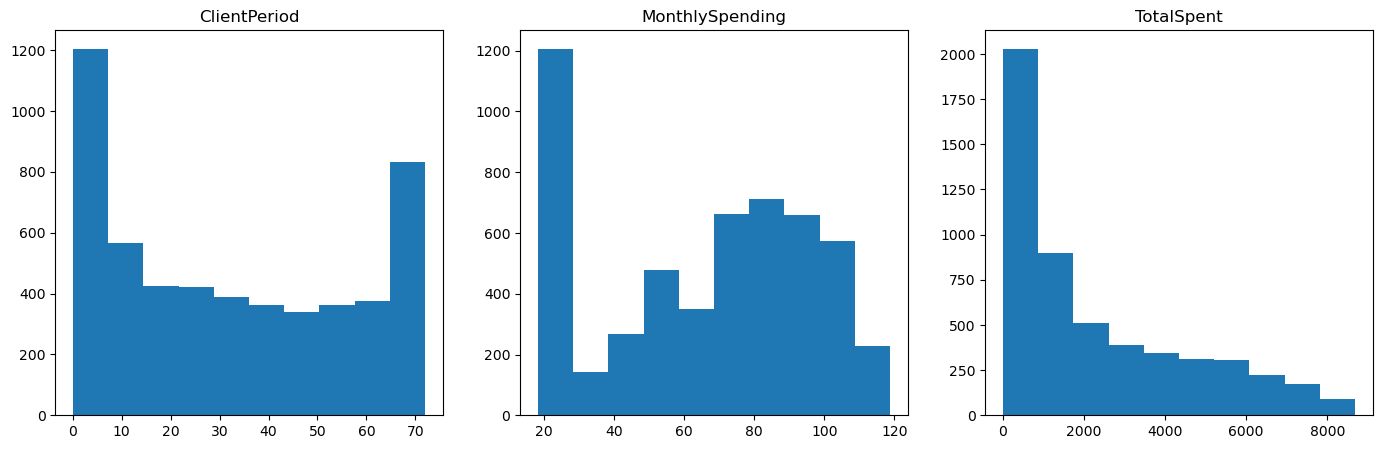

In [1119]:
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(17, 5))
for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(data[col])
    ax.set_title(col)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

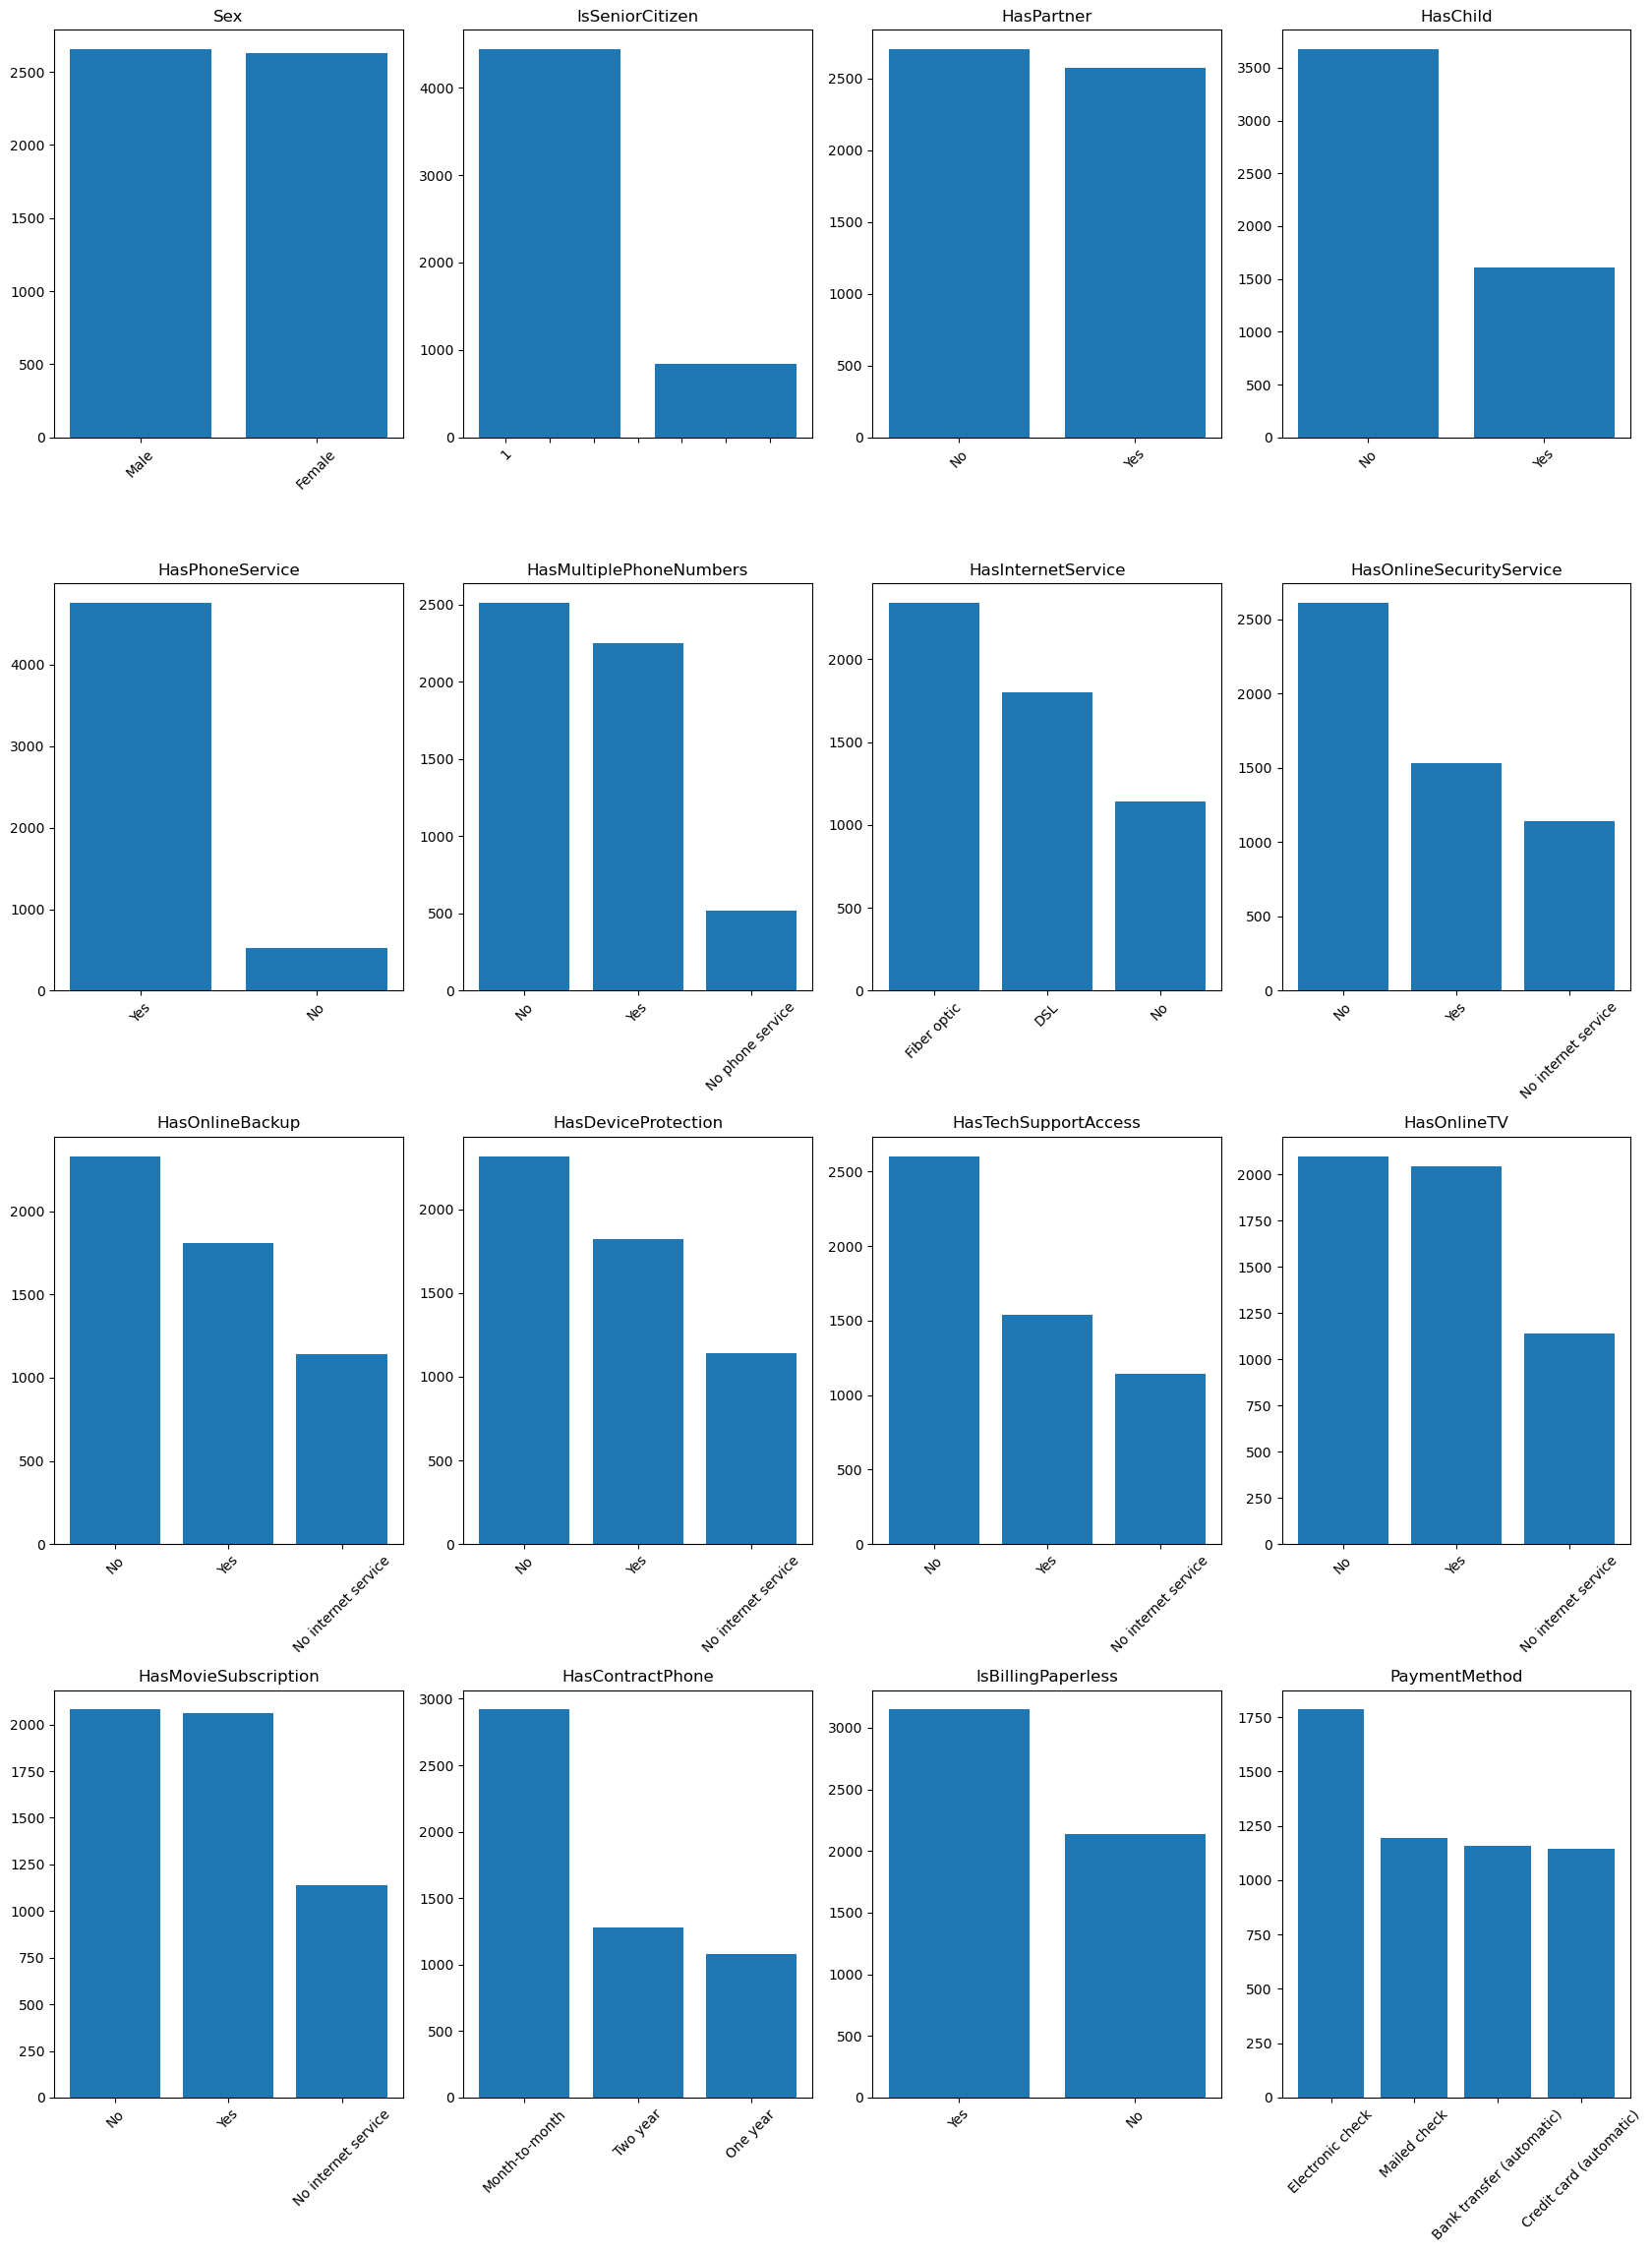

In [1121]:
length = len(cat_cols)//4
fig, ax = plt.subplots(nrows=4, ncols=length, figsize=(17, 23))
for i, col in enumerate(cat_cols):
    unic = data[col].value_counts()
    ax[i // length][ i - i // length * length].bar(unic.index, unic.values)
    ax[i // length][ i - i // length * length].set_title(col)
    ax[i // length][i - i // length * length].set_xticklabels(unic.index, rotation=45)
plt.tight_layout()
plt.show()

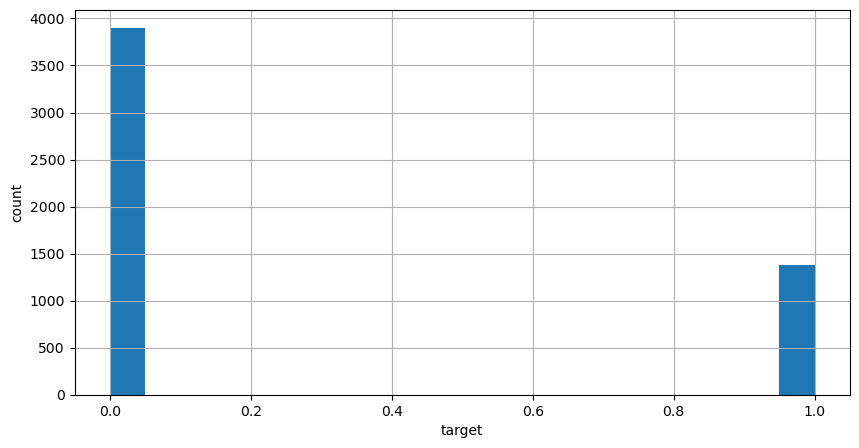

In [1122]:
plt.figure(figsize = (10, 5))

data['Churn'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('target')

plt.show()

<i>Из графика можно видеть, что классы несбалансированны<i>

In [1124]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
441,52,98.15,4993.40,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
4560,62,89.10,5618.30,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,0
5041,1,69.60,69.60,Female,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2431,4,70.50,294.20,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
2888,68,19.35,1292.65,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3393,4,85.65,321.65,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
4162,72,25.00,1738.90,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4936,66,79.85,5234.95,Male,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),0
1760,54,20.40,1090.60,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
3572,9,74.05,678.45,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [1126]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

<i>Для улучшения качества модели предварительно добавляем объекты с таргетом 0, чтобы данные были сблансированными. Далее проводим кодировку категориальных признаков, обучаем модель и выводим значения auc на каждом значении C. <i>

In [1128]:

positive=data[data['Churn']==0]
negative=data[data['Churn']==1]
from sklearn.utils import resample
spam_upsample = resample(negative,
             replace=True,
             n_samples=len(positive),
             random_state=42)
data_downsampled = pd.concat([positive, spam_upsample])


X=data_downsampled.drop(target_col, axis=1)
X = pd.get_dummies(X, columns=cat_cols, dtype=int)
y=data_downsampled['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C_values = [100, 10, 1, 0.1, 0.01, 0.001]
best_C = None
best_auc = 0
for C in C_values:
    model = LogisticRegressionCV(Cs=[C], cv=5, scoring='roc_auc', refit=True)
    model.fit(X_train, y_train)
    y_train_predicted = model.predict_proba(X_train_scaled)[:, 1]
    score_auc = np.mean(cross_val_score(model, X_train_scaled, y_train, scoring='roc_auc', cv=5))
    train_auc = roc_auc_score(y_train, y_train_predicted)
    print(train_auc)
    if score_auc > best_auc:
        best_auc = score_auc
        best_C = C
print(model)      
print(best_auc)
lr= LogisticRegression(C=best_C)
final=lr.fit(X_test_scaled, y_test)
y_test_predicted = model.predict_proba(X_test_scaled)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.8271183808073436
0.8264682843986635
0.8277145768175826
0.8271710468455152
0.8248465407310601
0.8203156156346129
LogisticRegressionCV(Cs=[0.001], cv=5, scoring='roc_auc')
0.8474361558880886
0.8261493378675933


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

<i>C value: 0.001 </br>
ROC-AUC:0.8261493378675933<i>

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [1132]:
!pip install catboost

<i>Аналогично обучаем модель CatBoost, без применения GridSearchCV, нормировки и кодирования категориальных признаков<i>

In [1133]:
from catboost import CatBoostClassifier
import catboost
X=data_downsampled.drop(target_col, axis=1)
y=data_downsampled['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
print(test_auc)

Learning rate set to 0.022509
0:	learn: 0.6846878	total: 22.8ms	remaining: 22.8s
1:	learn: 0.6747876	total: 61.1ms	remaining: 30.5s
2:	learn: 0.6650039	total: 95.4ms	remaining: 31.7s
3:	learn: 0.6564218	total: 129ms	remaining: 32.1s
4:	learn: 0.6486299	total: 164ms	remaining: 32.6s
5:	learn: 0.6411296	total: 199ms	remaining: 33s
6:	learn: 0.6346030	total: 231ms	remaining: 32.7s
7:	learn: 0.6274354	total: 260ms	remaining: 32.3s
8:	learn: 0.6202927	total: 290ms	remaining: 31.9s
9:	learn: 0.6139554	total: 320ms	remaining: 31.7s
10:	learn: 0.6082152	total: 344ms	remaining: 31s
11:	learn: 0.6026486	total: 373ms	remaining: 30.7s
12:	learn: 0.5978288	total: 407ms	remaining: 30.9s
13:	learn: 0.5923612	total: 442ms	remaining: 31.1s
14:	learn: 0.5872046	total: 471ms	remaining: 30.9s
15:	learn: 0.5822171	total: 500ms	remaining: 30.8s
16:	learn: 0.5770630	total: 528ms	remaining: 30.5s
17:	learn: 0.5725435	total: 558ms	remaining: 30.4s
18:	learn: 0.5681536	total: 587ms	remaining: 30.3s
19:	learn: 0

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

<i>best train auc: 0.9204105585120199</br>
best test auc: 0.8942331252024712<i>

# Предсказания

<i>Выберем CatBoost, как лучшую модель и получим predict_proba<i> 

In [1137]:
best_model = boosting_model

In [1138]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
predict =  best_model.predict_proba(X_test)[:, 1] 
submission['Churn'] = predict
submission.to_csv('my_submission.csv',index=False)
submission

,Id,Churn
0,0,0.097889
1,1,0.895578
2,2,0.892252
3,3,0.064854
4,4,0.004331
...,...,...
1756,1756,0.301920
1757,1757,0.017216
1758,1758,0.943166
1759,1759,0.847137


Лучшее решение отправьте в Stepik.

In [1140]:
sub = pd.read_csv('my_submission.csv')
sub

,Id,Churn
0,0,0.097889
1,1,0.895578
2,2,0.892252
3,3,0.064854
4,4,0.004331
...,...,...
1756,1756,0.301920
1757,1757,0.017216
1758,1758,0.943166
1759,1759,0.847137
